In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-70.82140116886954, -81.3112802644159),
 (79.1271245497332, -115.37342481944681),
 (-83.88557885908816, 44.70583140143154),
 (69.69697163622183, 35.031500163279645),
 (41.92933708436186, 0.13461859184033642),
 (-31.604449566194845, -79.35071349166196),
 (21.600389718765456, 5.210725080874795),
 (32.479056615131924, 84.5882868693775),
 (29.761702052383654, 19.12573730378162),
 (-72.91156008931767, -150.43499364447942),
 (41.8546176930806, -64.95285139819217),
 (-17.87847314418771, -173.17272072378094),
 (47.10204029004316, 119.02661674159799),
 (-75.17877215680515, -11.549428975643934),
 (32.33369476493657, 31.597523762387198),
 (-84.34035943310452, -19.64910414082479),
 (-86.05393991595346, 4.892465357028158),
 (62.890605292592994, 171.57062536313884),
 (-89.48052645375226, -10.702147499604564),
 (-23.813069525527368, -39.771542691916494),
 (18.66023509193407, 179.04001641975464),
 (80.31996455759062, 75.68464782267503),
 (69.89862532147245, -113.42165374477847),
 (-39.68006648244749

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-70.82140116886954 -81.3112802644159
79.1271245497332 -115.37342481944681
-83.88557885908816 44.70583140143154
69.69697163622183 35.031500163279645
41.92933708436186 0.13461859184033642
-31.604449566194845 -79.35071349166196
21.600389718765456 5.210725080874795
32.479056615131924 84.5882868693775
29.761702052383654 19.12573730378162
-72.91156008931767 -150.43499364447942
41.8546176930806 -64.95285139819217
-17.87847314418771 -173.17272072378094
47.10204029004316 119.02661674159799
-75.17877215680515 -11.549428975643934
32.33369476493657 31.597523762387198
-84.34035943310452 -19.64910414082479
-86.05393991595346 4.892465357028158
62.890605292592994 171.57062536313884
-89.48052645375226 -10.702147499604564
-23.813069525527368 -39.771542691916494
18.66023509193407 179.04001641975464
80.31996455759062 75.68464782267503
69.89862532147245 -113.42165374477847
-39.68006648244749 60.10782647534174
85.29773056652837 26.978561788927692
-83.05245670651902 -83.30665080797058
24.272884040492585 49.2

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca821e5a91852c1472ad9dce33477061


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 5 of Set 1 | monzon
Processing Record 6 of Set 1 | constitucion
Processing Record 7 of Set 1 | arlit
Processing Record 8 of Set 1 | jumla
Processing Record 9 of Set 1 | ajdabiya
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | shelburne
Processing Record 12 of Set 1 | neiafu
Processing Record 13 of Set 1 | hailar
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | damietta
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 19 of Set 1 | armacao dos buzios
City not found. Skipping...
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | saint-philippe
Pro

Processing Record 41 of Set 4 | vereshchagino
Processing Record 42 of Set 4 | aberdeen
Processing Record 43 of Set 4 | vallenar
Processing Record 44 of Set 4 | santa eulalia del rio
City not found. Skipping...
Processing Record 45 of Set 4 | salalah
Processing Record 46 of Set 4 | champerico
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | namie
Processing Record 49 of Set 4 | chapais
Processing Record 50 of Set 4 | dunedin
Processing Record 1 of Set 5 | cururupu
Processing Record 2 of Set 5 | beloha
Processing Record 3 of Set 5 | poum
Processing Record 4 of Set 5 | mnichovice
Processing Record 5 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 5 | rawson
Processing Record 7 of Set 5 | bowen
Processing Record 8 of Set 5 | puksoozero
Processing Record 9 of Set 5 | zeya
Processing Record 10 of Set 5 | saldanha
Processing Record 11 of Set 5 | scottsburgh
City not found. Skipping...
Processing Record 12 of Set 5 | sola
Processing Rec

Processing Record 29 of Set 8 | gemena
Processing Record 30 of Set 8 | luan
Processing Record 31 of Set 8 | maniitsoq
Processing Record 32 of Set 8 | alvaraes
Processing Record 33 of Set 8 | honiara
Processing Record 34 of Set 8 | lagoa
Processing Record 35 of Set 8 | bilma
Processing Record 36 of Set 8 | barrhead
Processing Record 37 of Set 8 | high level
Processing Record 38 of Set 8 | kodinsk
Processing Record 39 of Set 8 | soe
Processing Record 40 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 8 | asfi
Processing Record 42 of Set 8 | chililabombwe
Processing Record 43 of Set 8 | sembakung
Processing Record 44 of Set 8 | naze
Processing Record 45 of Set 8 | koungou
Processing Record 46 of Set 8 | bac lieu
Processing Record 47 of Set 8 | platanos
Processing Record 48 of Set 8 | puerto escondido
Processing Record 49 of Set 8 | kegayli
City not found. Skipping...
Processing Record 50 of Set 8 | santa lucia
Processing Record 1 of Set 9 | sao filipe
Proc

Processing Record 13 of Set 12 | qaqortoq
Processing Record 14 of Set 12 | brae
Processing Record 15 of Set 12 | roebourne
Processing Record 16 of Set 12 | ca mau
Processing Record 17 of Set 12 | tombouctou
Processing Record 18 of Set 12 | tual
Processing Record 19 of Set 12 | nha trang
Processing Record 20 of Set 12 | mwense
Processing Record 21 of Set 12 | yingkou
Processing Record 22 of Set 12 | petauke
Processing Record 23 of Set 12 | taranagar
Processing Record 24 of Set 12 | los andes
Processing Record 25 of Set 12 | meridian
Processing Record 26 of Set 12 | chibombo
Processing Record 27 of Set 12 | lebyazhye
Processing Record 28 of Set 12 | nemuro
Processing Record 29 of Set 12 | myitkyina
Processing Record 30 of Set 12 | tooele
Processing Record 31 of Set 12 | doha
Processing Record 32 of Set 12 | bulgan
Processing Record 33 of Set 12 | havelock
Processing Record 34 of Set 12 | kieta
Processing Record 35 of Set 12 | truckee
Processing Record 36 of Set 12 | kushmurun
Processing 

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,50.11,71,0,14.97,CL,2022-11-08 03:25:04
1,Yellowknife,62.4560,-114.3525,5.56,85,75,0.00,CA,2022-11-08 03:24:05
2,Port Alfred,-33.5906,26.8910,62.19,89,100,3.00,ZA,2022-11-08 03:28:48
3,Monzon,41.9108,0.1941,56.62,61,21,3.85,ES,2022-11-08 03:28:49
4,Constitucion,-35.3333,-72.4167,55.24,77,99,8.32,CL,2022-11-08 03:27:12
5,Arlit,18.7369,7.3853,69.67,22,35,7.74,NE,2022-11-08 03:28:49
6,Jumla,29.2747,82.1838,54.12,36,0,1.01,NP,2022-11-08 03:28:49
7,Ajdabiya,30.7554,20.2263,64.00,77,0,5.48,LY,2022-11-08 03:28:50
8,Mataura,-46.1927,168.8643,65.48,43,85,3.24,NZ,2022-11-08 03:28:50
9,Shelburne,44.0787,-80.2041,38.30,87,51,12.39,CA,2022-11-08 03:28:50


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-11-08 03:25:04,-53.1500,-70.9167,50.11,71,0,14.97
1,Yellowknife,CA,2022-11-08 03:24:05,62.4560,-114.3525,5.56,85,75,0.00
2,Port Alfred,ZA,2022-11-08 03:28:48,-33.5906,26.8910,62.19,89,100,3.00
3,Monzon,ES,2022-11-08 03:28:49,41.9108,0.1941,56.62,61,21,3.85
4,Constitucion,CL,2022-11-08 03:27:12,-35.3333,-72.4167,55.24,77,99,8.32


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

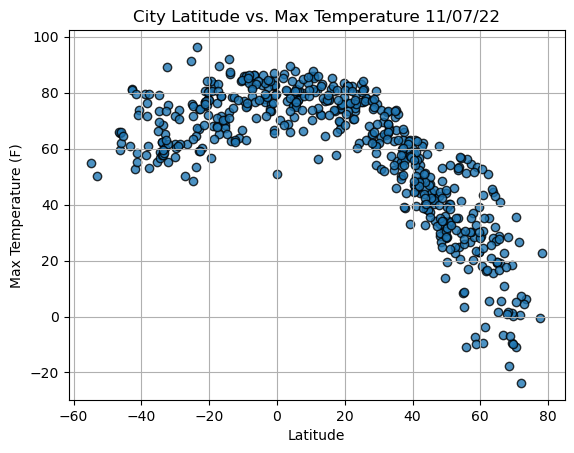

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

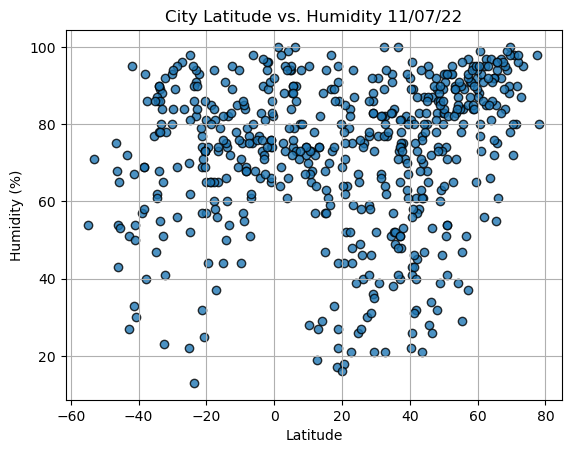

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

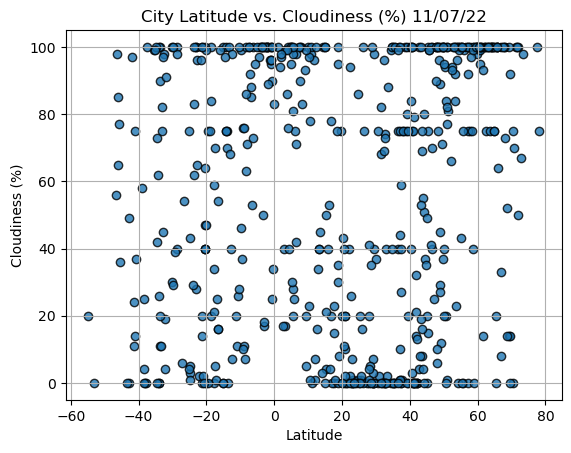

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

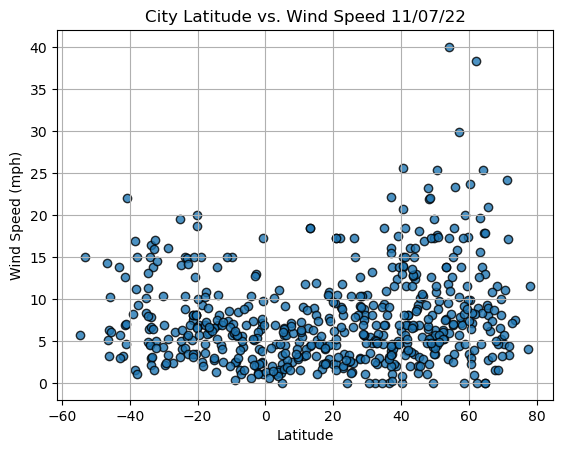

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()
